In [1]:
import pandas as pd
import numpy as np

In [4]:
import io 
  
df = pd.read_csv('~/Downloads/iris.csv')

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print(f"Number of features in the dataframe : {len(df.columns)}")

Number of features in the dataframe : 5


In [13]:
print("Feature\t\tType\n", df.dtypes)

Feature		Type
 sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [12]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
statistics  = pd.DataFrame(np.zeros((7, 4)), index=["Min", "Max", "Mean", "Range", "SD", "Variance", "90th Percentile"], columns=df.columns[0:4:1])
statistics.loc["Min"] = df.min()
statistics.loc["Max"] = df.max()
statistics.loc["Mean"] = df.mean()
statistics.loc["Range"] = statistics.loc["Max"]-statistics.loc["Min"]
statistics.loc["SD"] = df.std(ddof=0)
statistics.loc["Variance"] = df.var(ddof=0)
statistics.loc["90th Percentile"] = df.quantile(0.9)
print(statistics)

                 sepal length  sepal width  petal length  petal width
Min                  4.300000     2.000000      1.000000     0.100000
Max                  7.900000     4.400000      6.900000     2.500000
Mean                 5.843333     3.054000      3.758667     1.198667
Range                3.600000     2.400000      5.900000     2.400000
SD                   0.825301     0.432147      1.758529     0.760613
Variance             0.681122     0.186751      3.092425     0.578532
90th Percentile      6.900000     3.610000      5.800000     2.200000


In [16]:
def manualStats(df):
    statistics  = pd.DataFrame(np.zeros((7, 4)), index=["Min", "Max", "Mean", "Range", "SD", "Variance", "90th Percentile"], columns=df.columns[0:4:1])
    
    statistics.loc["Max"] = df.max()
    statistics.loc["Min"] = df.min()
    
    mean = pd.Series(np.zeros(4), index = df.columns[:4:])
    percentile = pd.Series(np.zeros(4), index = df.columns[:4:])
    
    for i in df.columns[:4:]:
        currCol = df[i].to_numpy()
        currCol = np.sort(currCol)
        for j in range(len(df.index)):
            mean[i] += df.iloc[j][i]
        percentile[i] = currCol[(int)((len(currCol)+1)*0.9)-1]
    
    mean /= len(df.index)
    
    statistics.loc["Mean"] = mean
    statistics.loc["90th Percentile"] = percentile
    statistics.loc["Range"] = statistics.loc["Max"]-statistics.loc["Min"]
    
    variance = pd.Series(np.zeros(4), index = df.columns[:4:])
    
    for i in df.columns[:4:]:
        currMean = mean[i]
        for j in range(len(df.index)):
            variance[i] += ((df.iloc[j][i] - currMean)**2)
    
    variance /= len(df.index)
    
    statistics.loc["Variance"] = variance
    statistics.loc["SD"] = variance**0.5
    
    return statistics

In [17]:
m_statistics = manualStats(df)
print(m_statistics)

                 sepal length  sepal width  petal length  petal width
Min                  4.300000     2.000000      1.000000     0.100000
Max                  7.900000     4.400000      6.900000     2.500000
Mean                 5.843333     3.054000      3.758667     1.198667
Range                3.600000     2.400000      5.900000     2.400000
SD                   0.825301     0.432147      1.758529     0.760613
Variance             0.681122     0.186751      3.092425     0.578532
90th Percentile      6.900000     3.600000      5.800000     2.200000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

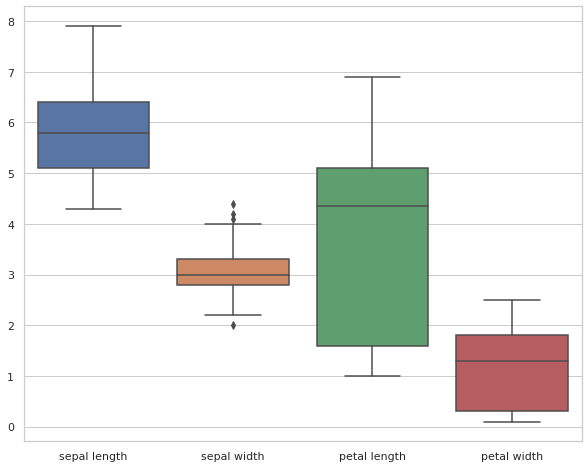

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df, orient="v")

<ipython-input-20-501320c614cd>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


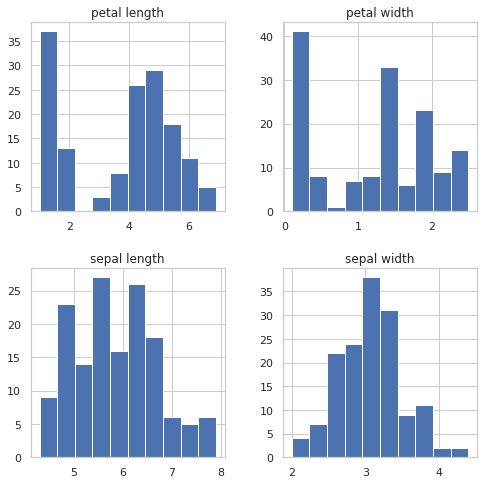

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()